In [131]:
import numpy as np
import pandas as pd

In [132]:
x = pd.read_csv("./DDI/data5/x.csv", index_col=0)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079
0,0.048905,0.011679,0.001975,0.021766,0.067953,0.037869,0.031675,0.019814,0.004830,0.083814,...,0.002892,0.048984,0.029960,0.039517,0.019952,0.034073,0.005839,0.005744,0.015549,0.031381
1,0.049622,0.011937,0.002033,0.022423,0.067662,0.041857,0.033858,0.018942,0.004744,0.081488,...,0.003578,0.049885,0.027282,0.038969,0.020614,0.035464,0.006810,0.005767,0.014316,0.032913
2,0.049377,0.012678,0.002111,0.022569,0.071262,0.037874,0.033509,0.015293,0.005129,0.080742,...,0.002363,0.045649,0.030092,0.038292,0.021105,0.034499,0.005615,0.004780,0.013970,0.031146
3,0.049119,0.012059,0.002043,0.021865,0.067989,0.039044,0.032324,0.019768,0.004840,0.083220,...,0.002366,0.051522,0.028062,0.037822,0.020210,0.031624,0.006413,0.005942,0.015166,0.032682
4,0.050868,0.011680,0.002006,0.021329,0.067009,0.039194,0.031737,0.020214,0.005168,0.081305,...,0.003031,0.051998,0.028592,0.038804,0.018502,0.032700,0.007472,0.006499,0.014712,0.030189


In [133]:
y = pd.read_csv("./DDI/data5/y.csv", index_col=0)
y.head()

,0
0,1
1,3
2,2
3,0
4,0


In [134]:
x.shape, y.shape

((10000, 2080), (10000, 1))

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7500, 2080), (2500, 2080), (7500, 1), (2500, 1))

In [183]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred)

c:\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [184]:
acc_knn

0.6456

In [182]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_dt = accuracy_score(y_test, y_pred)
acc_dt

0.5232

In [185]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc_rc = accuracy_score(y_test, y_pred)
acc_rc

c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:1178: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5652

In [103]:
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Activation, BatchNormalization, LSTM, MaxPooling1D, Conv1D
from keras.callbacks import EarlyStopping

In [137]:
y_train_one_hot = []
for i in range(len(y_train)):
    curr = np.zeros(65, dtype='float32')
    curr[y_train.iloc[i, 0]] = 1
    y_train_one_hot.append(curr)

y_train_one_hot = np.array(y_train_one_hot)

y_test_one_hot = []
for i in range(len(y_test)):
    curr = np.zeros(65, dtype='float32')
    curr[y_test.iloc[i, 0]] = 1
    y_test_one_hot.append(curr)

y_test_one_hot = np.array(y_test_one_hot)

y_train_one_hot.shape, y_test_one_hot.shape

((7500, 65), (2500, 65))

In [138]:
def DNN():
    train_input = Input(shape=(2080,), name='Inputlayer')
    train_in = Dense(512, activation='relu')(train_input)
    train_in = BatchNormalization()(train_in)
    train_in = Dropout(0.3)(train_in)
    train_in = Dense(256, activation='relu')(train_in)
    train_in = BatchNormalization()(train_in)
    train_in = Dropout(0.3)(train_in)
    train_in = Dense(65)(train_in)
    out = Activation('softmax')(train_in)
    model = Model(inputs=train_input, outputs=out)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # binary_crossentropy
    return model

In [158]:
dnn = DNN()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')
history = dnn.fit(x_train, y_train_one_hot, batch_size=128, epochs=100,
        validation_data=(x_test, y_test_one_hot),
        callbacks=[early_stopping])
y_pred = dnn.predict(x_test)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.3578 - loss: 3.0897 - val_accuracy: 0.2452 - val_loss: 3.6302
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5837 - loss: 1.6495 - val_accuracy: 0.3796 - val_loss: 3.0364
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6269 - loss: 1.3527 - val_accuracy: 0.3976 - val_loss: 2.6252
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6750 - loss: 1.1682 - val_accuracy: 0.2508 - val_loss: 2.5226
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7001 - loss: 1.0228 - val_accuracy: 0.2592 - val_loss: 2.3941
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7117 - loss: 0.9255 - val_accuracy: 0.3144 - val_loss: 2.3234
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7344 - loss: 0.8647 - val_accuracy: 0.4248 - val_loss: 1.9747
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7435 - loss: 0.8043 - val_accuracy: 0.

In [140]:
dnn.save("./models/dnn.h5")

In [141]:
y_pred = dnn.predict(x_test)
y_pred

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[8.7415089e-07, 4.5168441e-02, 1.1649971e-04, ..., 1.5122432e-06,
        9.0463727e-06, 1.4500032e-06],
       [1.9884530e-08, 1.3942956e-05, 6.5632149e-09, ..., 7.6643630e-07,
        3.0509713e-07, 3.8497681e-08],
       [2.5942102e-01, 1.8733222e-03, 1.1139036e-02, ..., 1.1513853e-03,
        2.2397704e-04, 1.7173879e-04],
       ...,
       [4.3468994e-01, 2.0355639e-05, 3.7212656e-06, ..., 1.6535458e-04,
        7.6222420e-04, 4.7046295e-05],
       [8.3665783e-11, 2.1371919e-08, 2.5895120e-06, ..., 1.4922250e-08,
        4.7839882e-07, 1.0669365e-06],
       [1.0072087e-07, 1.1814954e-02, 1.9608028e-03, ..., 7.6050583e-08,
        8.3159728e-07, 7.1397012e-06]], dtype=float32)

In [142]:
def get_dnn_acc(y_test, y_pred):
    correct = 0
    for i in range(len(y_test)):
        if(y_test[i].argmax() == y_pred[i].argmax()):
            correct += 1
    acc = correct / len(y_test)
    return acc

In [143]:
acc_dnn = get_dnn_acc(y_test_one_hot, y_pred)
acc_dnn

0.5816

In [154]:
import tensorflow as tf

# Define the ELM model
class ELM:
    def __init__(self, input_size, hidden_size, output_size):
        # Randomly initialize the input-to-hidden layer weights and biases
        self.input_weights = tf.Variable(tf.random.normal([input_size, hidden_size], dtype='double'), trainable=False)
        self.biases = tf.Variable(tf.random.normal([hidden_size], dtype='double'), trainable=False)
        self.output_weights = None  # This will be solved using least squares

    def hidden_layer_output(self, X):
        # Compute the hidden layer output (non-trainable)
        H = tf.matmul(X, self.input_weights) + self.biases
        H = tf.nn.relu(H)  # Apply activation function (ReLU)
        return H

    def fit(self, X_train, Y_train):
        # Compute the hidden layer output
        H = self.hidden_layer_output(X_train)
        
        # Solve the output weights using the Moore-Penrose pseudoinverse
        H_pinv = tf.linalg.pinv(H)  # Compute the pseudoinverse of H
        self.output_weights = tf.matmul(H_pinv, Y_train)  # Output weights

    def predict(self, X):
        # Compute hidden layer output for test data
        H = self.hidden_layer_output(X)
        # Compute predictions
        return tf.matmul(H, self.output_weights)

# Initialize ELM model
input_size = 2080    # Number of features
hidden_size = 2048   # Number of hidden neurons, can be adjusted
output_size = 65     # Number of classes

elm = ELM(input_size, hidden_size, output_size)

# Train the ELM model
elm.fit(x_train, y_train_one_hot)

# Predict on the test set
y_pred = elm.predict(x_test)
y_pred


<tf.Tensor: shape=(2500, 65), dtype=float64, numpy=
array([[ 0.04413947,  0.23274931,  0.14699186, ..., -0.00091828,
         0.        ,  0.01392493],
       [ 0.40268684,  0.18647786, -0.13414402, ..., -0.00984178,
         0.        ,  0.00165303],
       [ 0.77267781,  0.17777792,  0.09575014, ...,  0.00161993,
         0.        ,  0.01084861],
       ...,
       [ 0.53173731, -0.17044351, -0.06610823, ...,  0.00483252,
         0.        ,  0.00549821],
       [-0.07508512, -0.12996185,  0.55788977, ..., -0.0059751 ,
         0.        ,  0.02891213],
       [-0.68805556,  0.78666743,  0.56546385, ..., -0.00734338,
         0.        ,  0.00726322]])>

In [155]:
acc_elm = get_dnn_acc(y_test_one_hot, np.array(y_pred))
acc_elm

0.7392

In [156]:
y_pred = elm.predict(x_train)
acc_elm_training = get_dnn_acc(y_train_one_hot, np.array(y_pred))
acc_elm_training

0.8816

In [157]:
import matplotlib.pyplot as plt

In [169]:
dnn_acc_training = history.history['accuracy'][-1]
dnn_acc_training

0.8586666584014893

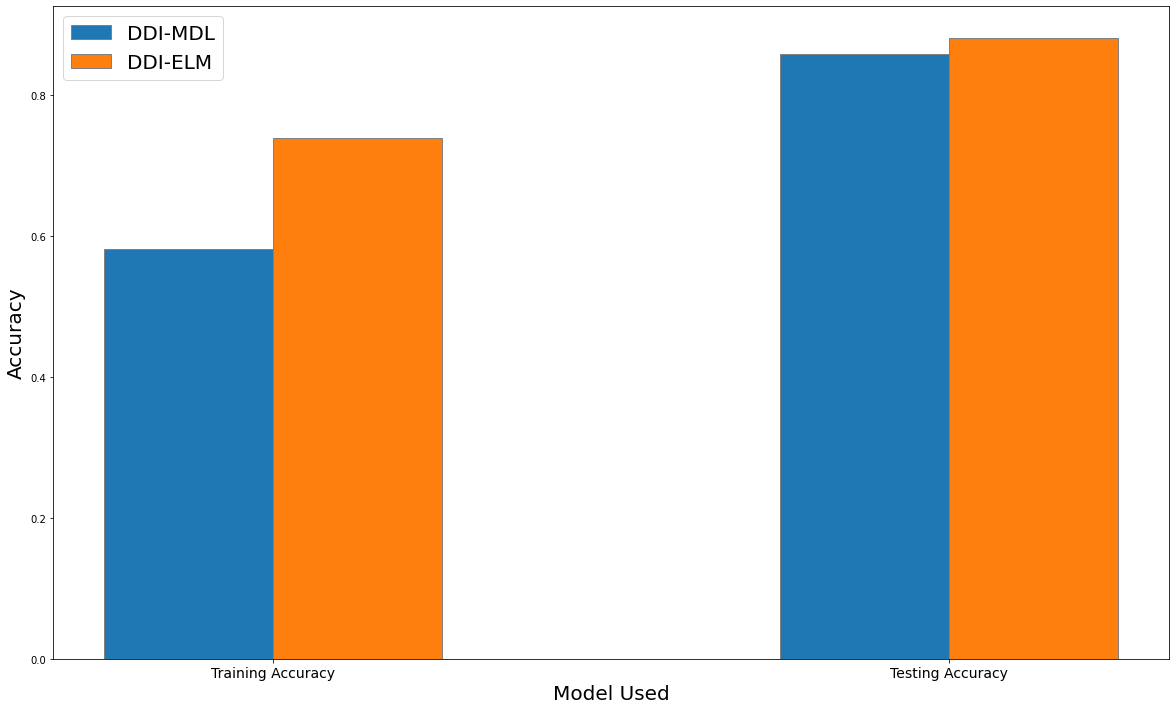

In [194]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(20, 12)) 

# set height of bar 
dnn_params = [acc_dnn, dnn_acc_training]
elm_parmas = [acc_elm, acc_elm_training]

# Set position of bar on X axis 
br1 = np.arange(len(dnn_params)) 
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, dnn_params, width = barWidth, 
        edgecolor ='grey', label ='DDI-MDL') 
plt.bar(br2, elm_parmas, width = barWidth, 
        edgecolor ='grey', label ='DDI-ELM')

# Adding Xticks 
plt.xlabel('Model Used', fontsize = 20) 
plt.ylabel('Accuracy', fontsize = 20) 
plt.xticks([r + (barWidth/2) for r in range(len(dnn_params))], 
        ['Training Accuracy', 'Testing Accuracy'],fontsize = 14)

plt.legend(prop = { "size": 20 })
plt.show() 

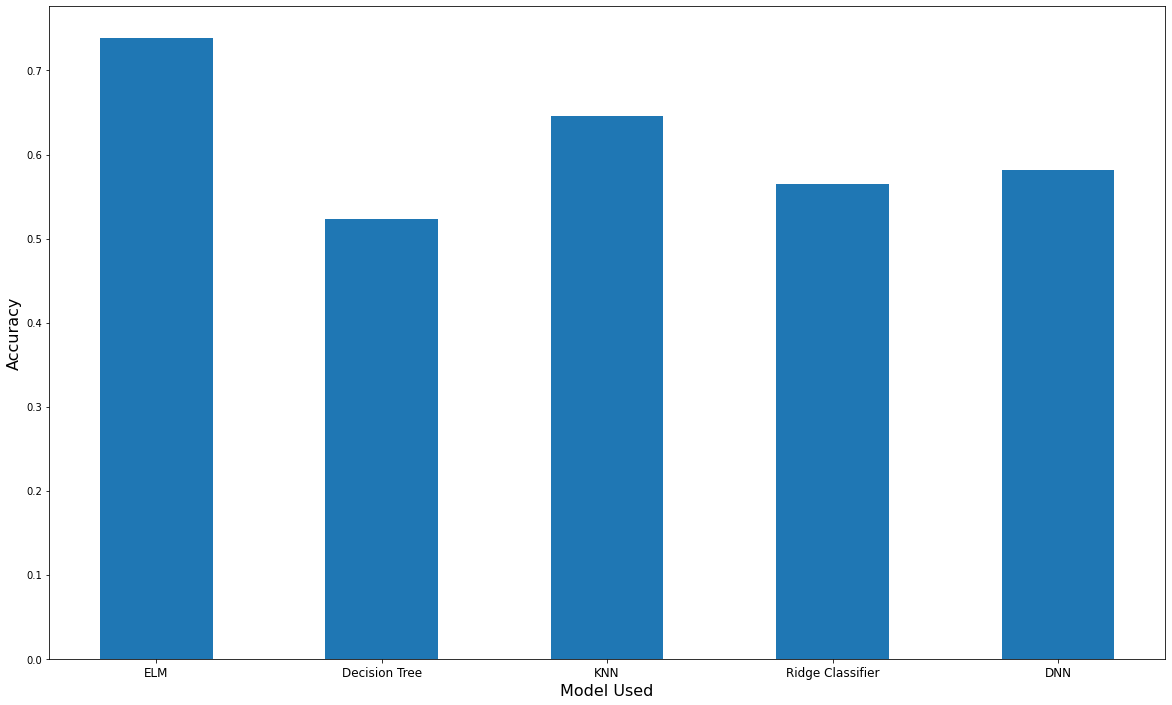

In [200]:
# set width of bar 
fig = plt.subplots(figsize =(20, 12))
barWidth = 0.5

# set height of bar 
acc_list = [acc_elm, acc_dt, acc_knn, acc_rc, acc_dnn]

# Set position of bar on X axis 
br1 = np.arange(len(acc_list))

# Make the plot
plt.bar(br1, acc_list, width=barWidth)

# Adding Xticks 
plt.xlabel('Model Used', fontsize = 16) 
plt.ylabel('Accuracy', fontsize = 16) 
plt.xticks([r for r in range(len(acc_list))], 
        ['ELM', 'Decision Tree', 'KNN', 'Ridge Classifier', 'DNN'], fontsize=12)

plt.show() 

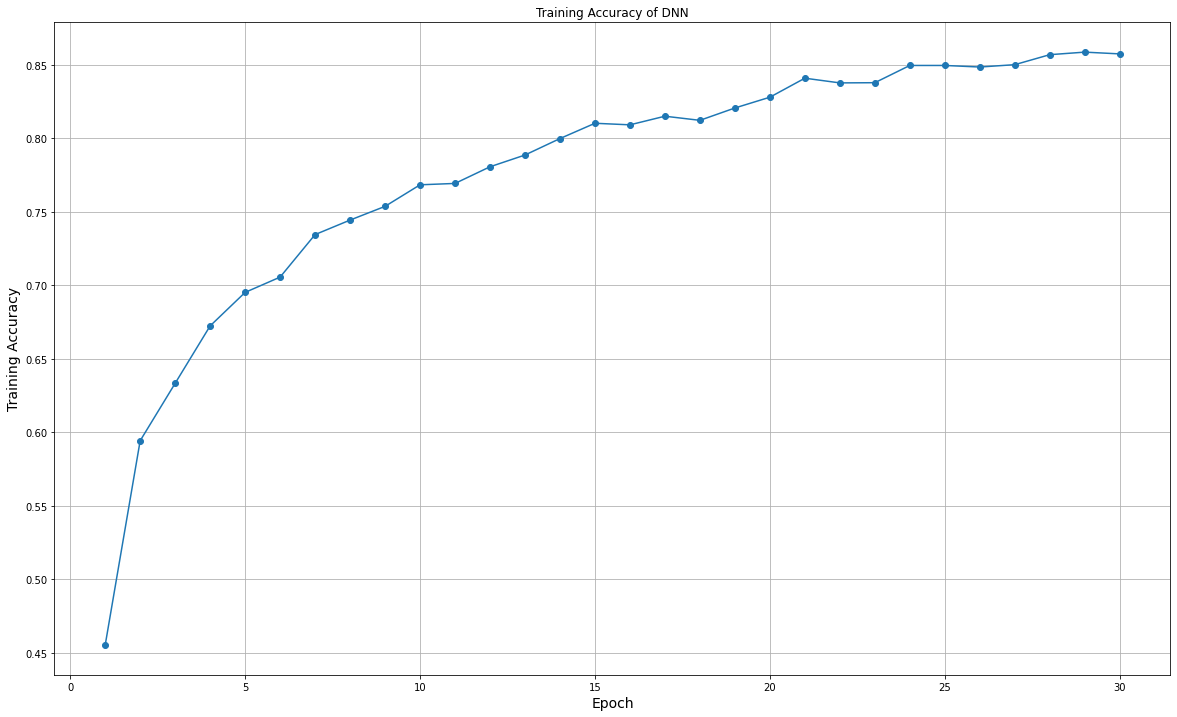

In [213]:
y_pos = history.history['accuracy']
x_pos = [i+1 for i in range(len(y_pos))]

# Create a line chart
plt.figure(figsize=(20, 12))
plt.plot(x_pos, y_pos, marker='o', linestyle='-')

# Add title and labels
plt.title('Training Accuracy of DNN')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Training Accuracy', fontsize=14)

# Display grid
plt.grid(True)

# Show the plot
plt.show()

In [214]:
acc_elm, acc_elm_training, acc_dnn, dnn_acc_training

(0.7392, 0.8816, 0.5816, 0.8586666584014893)